In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
random_state=3
# %matplotlib

In [104]:
# !pip install imblearn

In [2]:
data=pd.read_csv('train_1.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,health_insurance,investment_plans,term_insurance,life_time_value
0,Male,Urban,High School,2L-5L,1,4,0,More than 1,C,1,0,0,medium
1,Female,Urban,High School,5L-10L,1,8,8150,More than 1,A,0,0,1,high
2,Male,Urban,High School,2L-5L,1,8,8679,More than 1,C,1,1,1,high
3,Female,Rural,Bachelor,5L-10L,1,7,6555,1,B,1,0,0,low
4,Female,Urban,Bachelor,2L-5L,1,7,0,More than 1,B,1,0,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,Female,Rural,Bachelor,5L-10L,0,1,10413,More than 1,A,1,0,1,high
89388,Female,Urban,High School,5L-10L,1,1,2886,More than 1,C,1,0,0,medium
89389,Female,Rural,Others,5L-10L,0,6,0,More than 1,A,1,0,1,low
89390,Female,Urban,High School,5L-10L,0,4,9407,More than 1,A,0,1,0,medium


In [3]:
# check rows and columns of the dataset
data.shape

(89392, 13)

In [4]:
# Check unique values of target varaible
data['life_time_value'].value_counts()

medium    43924
high      24881
low       20587
Name: life_time_value, dtype: int64

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['marital_status', 'vintage', 'claim_amount', 'health_insurance', 'investment_plans', 'term_insurance']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'life_time_value']


In [6]:
#let's check missing values
data.isna().sum()

gender              0
area                0
qualification       0
income              0
marital_status      0
vintage             0
claim_amount        0
num_policies        0
policy              0
health_insurance    0
investment_plans    0
term_insurance      0
life_time_value     0
dtype: int64

In [7]:
# data.drop(['health_insurance', 'investment_plans', 'term_insurance'],axis=1,inplace=True)

In [8]:
# check for duplicate data
print(f"there are total {len(data[data.duplicated(keep=False)])} duplicate values outof which {len(data[data.duplicated(keep=False)])-len(data[data.duplicated()])} are unique")

there are total 11568 duplicate values outof which 3641 are unique


there are total 16364 duplicate values outof which 2980 are unique

In [9]:
# drop duplicate data
df=data.drop_duplicates(subset=['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy'],keep='first')
len(df)

73744

In [10]:
# Check new unique values of target varaible
df['life_time_value'].value_counts()

medium    35892
high      22118
low       15734
Name: life_time_value, dtype: int64

In [11]:
df.describe()

,marital_status,vintage,claim_amount,health_insurance,investment_plans,term_insurance
count,73744.000000,73744.000000,73744.000000,73744.000000,73744.000000,73744.000000
mean,0.559422,4.579545,5232.914691,0.450165,0.450694,0.534376
std,0.496460,2.289733,2871.093507,0.497514,0.497566,0.498820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3491.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,4779.000000,0.000000,0.000000,1.000000
75%,1.000000,6.000000,6386.000000,1.000000,1.000000,1.000000
max,1.000000,8.000000,31894.000000,1.000000,1.000000,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_3832\2665391218.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


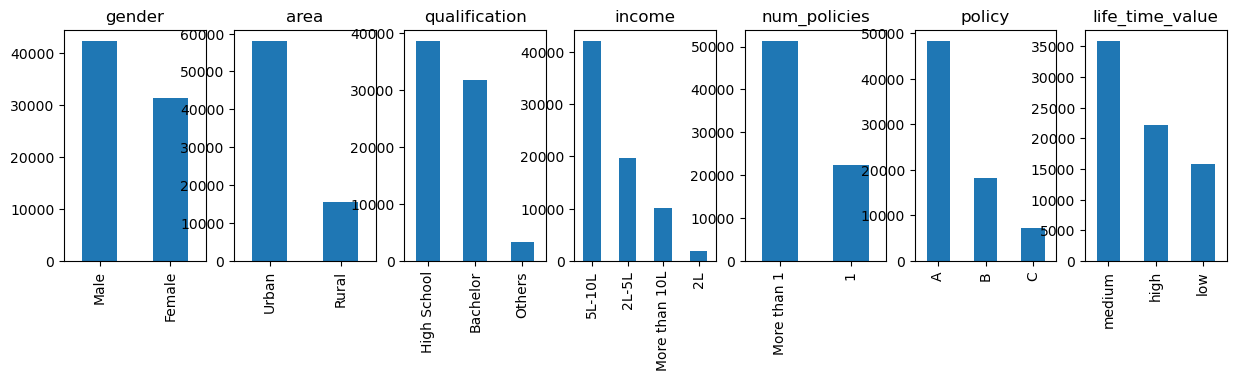

In [41]:
fig, ax = plt.subplots(1, int(len(categorical_features)),figsize=(15,3))

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1904a519d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1904a9cdbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904a519100>],
 'medians': [<matplotlib.lines.Line2D at 0x1904a9cd2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1904a9cd160>],
 'means': []}

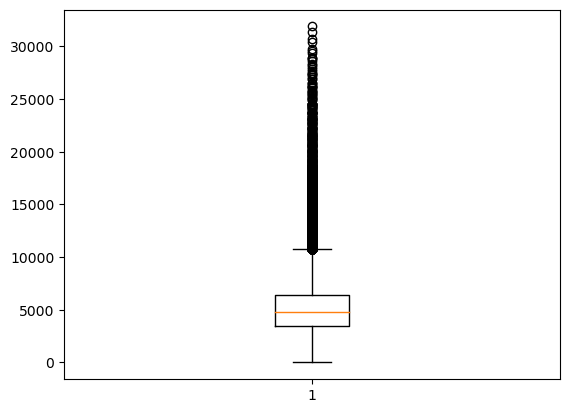

In [58]:
plt.boxplot(df.claim_amount)

In [60]:
df['life_time_value']=df['life_time_value'].map({'low':0,'medium':1,'high':2})
df

C:\Users\HP\AppData\Local\Temp\ipykernel_3832\2959030516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['life_time_value']=df['life_time_value'].map({'low':0,'medium':1,'high':2})


,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,health_insurance,investment_plans,term_insurance,life_time_value
0,Male,Urban,High School,2L-5L,1,4,0,More than 1,C,1,0,0,1
1,Female,Urban,High School,5L-10L,1,8,8150,More than 1,A,0,0,1,2
2,Male,Urban,High School,2L-5L,1,8,8679,More than 1,C,1,1,1,2
3,Female,Rural,Bachelor,5L-10L,1,7,6555,1,B,1,0,0,0
4,Female,Urban,Bachelor,2L-5L,1,7,0,More than 1,B,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89386,Male,Urban,High School,2L,0,2,4211,1,A,1,0,0,1
89387,Female,Rural,Bachelor,5L-10L,0,1,10413,More than 1,A,1,0,1,2
89388,Female,Urban,High School,5L-10L,1,1,2886,More than 1,C,1,0,0,1
89390,Female,Urban,High School,5L-10L,0,4,9407,More than 1,A,0,1,0,1


In [64]:
X=df.drop(['life_time_value'],axis=1)
y=df['life_time_value']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
x_test

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,health_insurance,investment_plans,term_insurance
40468,Male,Urban,High School,5L-10L,0,2,6376,More than 1,A,0,0,1
10132,Female,Urban,High School,5L-10L,1,3,2996,More than 1,A,0,1,1
52747,Male,Urban,High School,5L-10L,1,3,4981,1,A,1,0,0
35318,Female,Urban,Bachelor,5L-10L,0,7,2532,More than 1,A,1,0,0
52262,Male,Urban,Bachelor,2L-5L,1,3,7828,More than 1,A,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72663,Female,Urban,High School,5L-10L,0,6,4263,More than 1,A,1,1,1
7132,Male,Urban,High School,2L-5L,0,3,5876,1,A,0,1,0
56956,Male,Urban,Bachelor,5L-10L,1,7,4230,More than 1,A,0,1,1
24794,Male,Urban,High School,2L-5L,1,6,5152,1,A,0,1,0


In [89]:
from category_encoders import TargetEncoder
target='life_time_value'
cols=categorical_features[:-1]
for col in cols:
    te=TargetEncoder()
    te.fit(X=x_train[col],y=y_train)
#     values=te.transform(x_train[col])
#     X_train=pd.concat([X_train,values],axis=1)
    values1=te.transform(x_test[col])
    X_test=pd.concat([X_test,values1],axis=1)
X_train.head()

,gender,area,qualification,income,num_policies,policy
3463,1.070184,0.962712,1.091120,1.059526,1.366832,1.092397
66634,1.106625,1.118853,1.091120,1.157693,0.443566,1.092397
9913,1.106625,1.118853,1.103675,1.157693,0.443566,1.101045
71479,1.070184,0.962712,1.091120,1.157693,1.366832,1.101045
84797,1.070184,1.118853,1.103675,1.059526,0.443566,1.092397


In [90]:
# X_test.drop(X_test.columns,axis=1,inplace=True)
X_test

,gender,area,qualification,income,num_policies,policy
40468,1.070184,1.118853,1.091120,1.059526,1.366832,1.092397
10132,1.106625,1.118853,1.091120,1.059526,1.366832,1.092397
52747,1.070184,1.118853,1.091120,1.059526,0.443566,1.092397
35318,1.106625,1.118853,1.103675,1.059526,1.366832,1.092397
52262,1.070184,1.118853,1.103675,1.157693,1.366832,1.092397
...,...,...,...,...,...,...
72663,1.106625,1.118853,1.091120,1.059526,1.366832,1.092397
7132,1.070184,1.118853,1.091120,1.157693,0.443566,1.092397
56956,1.070184,1.118853,1.103675,1.059526,1.366832,1.092397
24794,1.070184,1.118853,1.091120,1.157693,0.443566,1.092397


In [92]:
train=pd.concat([X_train,x_train.drop(cols,axis=1)],axis=1)
test=pd.concat([X_test,x_test.drop(cols,axis=1)],axis=1)
train.head()

,gender,area,qualification,income,num_policies,policy,marital_status,vintage,claim_amount,health_insurance,investment_plans,term_insurance
3463,1.070184,0.962712,1.091120,1.059526,1.366832,1.092397,1,5,3484,1,0,0
66634,1.106625,1.118853,1.091120,1.157693,0.443566,1.092397,1,3,5290,0,1,0
9913,1.106625,1.118853,1.103675,1.157693,0.443566,1.101045,1,4,5338,0,0,1
71479,1.070184,0.962712,1.091120,1.157693,1.366832,1.101045,1,6,5254,0,0,1
84797,1.070184,1.118853,1.103675,1.059526,0.443566,1.092397,1,1,5832,0,1,0


In [120]:
scaler = RobustScaler()

train.claim_amount = scaler.fit_transform((train.claim_amount.values).reshape(-1, 1))
test.claim_amount = scaler.transform(test.claim_amount.values.reshape(-1, 1))
test

,gender,area,qualification,income,num_policies,policy,marital_status,vintage,claim_amount,health_insurance,investment_plans,term_insurance
40468,1.070184,1.118853,1.091120,1.059526,1.366832,1.092397,0,2,0.551927,0,0,1
10132,1.106625,1.118853,1.091120,1.059526,1.366832,1.092397,1,3,-0.616209,0,1,1
52747,1.070184,1.118853,1.091120,1.059526,0.443566,1.092397,1,3,0.069812,1,0,0
35318,1.106625,1.118853,1.103675,1.059526,1.366832,1.092397,0,7,-0.776568,1,0,0
52262,1.070184,1.118853,1.103675,1.157693,1.366832,1.092397,1,3,1.053741,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72663,1.106625,1.118853,1.091120,1.059526,1.366832,1.092397,0,6,-0.178331,1,1,1
7132,1.070184,1.118853,1.091120,1.157693,0.443566,1.092397,0,3,0.379126,0,1,0
56956,1.070184,1.118853,1.103675,1.059526,1.366832,1.092397,1,7,-0.189736,0,1,1
24794,1.070184,1.118853,1.091120,1.157693,0.443566,1.092397,1,6,0.128910,0,1,0


In [124]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgc=HistGradientBoostingClassifier()
hgc.fit(x_res,y_res)
y_hgc=hgc.predict(test)


In [125]:
print("Accuracy Score- ",accuracy_score(y_test,y_hgc),end="\n")
print("Classification Report ",classification_report(y_test,y_hgc),end="\n")
cm=confusion_matrix(y_test,y_hgc)
print(cm,end="\n")

Accuracy Score-  0.5447148959251474
Classification Report                precision    recall  f1-score   support

           0       0.60      0.86      0.71      3127
           1       0.63      0.31      0.42      7163
           2       0.46      0.70      0.56      4459

    accuracy                           0.54     14749
   macro avg       0.56      0.62      0.56     14749
weighted avg       0.57      0.54      0.52     14749

[[2685  161  281]
 [1587 2227 3349]
 [ 182 1155 3122]]


Accuracy Score-  0.5785476981490271
Classification Report                precision    recall  f1-score   support

           0       0.60      0.84      0.70      3127
           1       0.58      0.64      0.60      7163
           2       0.54      0.30      0.39      4459

    accuracy                           0.58     14749
   macro avg       0.57      0.59      0.56     14749
weighted avg       0.57      0.58      0.56     14749

[[2626  425   76]
 [1543 4566 1054]
 [ 173 2945 1341]]

In [99]:
df2=pd.concat([train,y_train],axis=1)

In [121]:
ros=RandomOverSampler(random_state=random_state)
x_res,y_res=ros.fit_resample(train,y_train)
y_res.value_counts()

2    28729
1    28729
0    28729
Name: life_time_value, dtype: int64

In [113]:
df3=pd.concat([test,y_test],axis=1)
df4=pd.concat([x_res,y_res],axis=1)
df2.to_csv('train_2.csv')
df3.to_csv('test.csv')
df4.to_csv('balanced_trainset.csv')

In [116]:
df4

,gender,area,qualification,income,num_policies,policy,marital_status,vintage,claim_amount,health_insurance,investment_plans,term_insurance,life_time_value
0,1.070184,0.962712,1.091120,1.059526,1.366832,1.092397,1,5,3484,1,0,0,2
1,1.106625,1.118853,1.091120,1.157693,0.443566,1.092397,1,3,5290,0,1,0,1
2,1.106625,1.118853,1.103675,1.157693,0.443566,1.101045,1,4,5338,0,0,1,0
3,1.070184,0.962712,1.091120,1.157693,1.366832,1.101045,1,6,5254,0,0,1,1
4,1.070184,1.118853,1.103675,1.059526,0.443566,1.092397,1,1,5832,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86182,1.106625,0.962712,1.091120,1.038204,1.366832,1.092397,1,6,3068,1,0,0,2
86183,1.070184,1.118853,1.103675,1.038204,1.366832,1.092397,1,8,4099,0,1,1,2
86184,1.070184,1.118853,1.091120,1.157693,1.366832,1.101045,0,7,6440,0,1,0,2
86185,1.106625,1.118853,1.091120,1.059526,1.366832,1.061731,0,7,6007,0,0,1,2
